In [1]:
#My google drive path
my_path = "/content/drive/MyDrive/6. Spring 2024 Courses/DATA 450/"

##Package Installs & Imports

Install: pystac_client planetary_computer rioxarray contextily

Import: pystac_client, planetary_computer, rioxarray as rio, rasterio, rasterio.plot.show, geopandas as gpd, matplotlib.pyplot as plt, shapely.get_coordinates(),  requests, IPython.display.Image, contextily as ctx

In [2]:
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.4 MB/s eta 0:00:00


In [3]:
#install packages
!pip install pystac_client planetary_computer contextily rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 4.8 MB/s eta 0:00:00


In [4]:
#import packages and get functions
import pystac_client
import planetary_computer
import rioxarray as rio
import contextily as ctx
import rasterio
from rasterio.plot import show

import geopandas as gpd
import matplotlib.pyplot as plt

from shapely import get_coordinates

import requests

from IPython.display import Image


##Import data and check geopandas dataframe
read in geojson file, explanation of column names, and summary stats.

In [5]:
timber = gpd.read_file(my_path+"CAL_FIRE_Timber_Harvesting_Plans_All_TA83_2639850418551769154.geojson")

In [6]:
timber.columns #column names

Index(['OBJECTID', 'GIS_ACRES', 'REGION', 'THP_YEAR', 'THP_NUM', 'COUNTY',
       'TIMBEROWNR', 'LANDOWNER', 'SILVI_1', 'SILVI_2', 'SILVI_CAT', 'YARD',
       'UNIT', 'PLAN_STAT', 'APPROVED', 'COMPLETED', 'COMMENTS', 'SPATL_MOD',
       'MODIFIED', 'HD_NUM', 'GLOBALID', 'geometry'],
      dtype='object')

In [7]:
timber.describe()

OBJECTID     GIS_ACRES        REGION      THP_YEAR       THP_NUM
count   73433.000000  73433.000000  73433.000000  73433.000000  73433.000000
mean    47166.644479     20.265127      1.604251   2015.425109     74.850381
std     29396.816177    109.816744      0.847445      4.002237     52.182437
min         1.000000      0.000519      1.000000   2009.000000      1.000000
25%     22948.000000      1.413363      1.000000   2012.000000     31.000000
50%     45264.000000      6.377017      1.000000   2015.000000     69.000000
75%     66647.000000     18.795057      2.000000   2019.000000    108.000000
max    116896.000000   8938.382409      4.000000   2023.000000    224.000000

###description of column names (features)

1. 'OBJECTID', Internal feature number: Sequential unique whole numbers that are automatically generated.

2. 'GIS_ACRES', GIS-calculated acreage

3. 'REGION', Administrative area:
```
[1: Coast, 2: Cascade, 3: South, 4: Sierra]
```
4. 'THP_YEAR', Year Timber Harvesting Plan (THP) submitted

5. 'THP_NUM', Timber Harvest Plan Number, Note: THP number starts from 1 at the beginning of every year.

6. 'COUNTY', County Code (County Name):
```
[ALA (Alameda), ALP (Alpine), AMA (Amador),, BUT (Butte), CAL (Calaveras), COL (Colusa), CCA (Contra Costa), DEL (Del Norte), ELD (El Dorado), FRE (Fresno), GLE (Glenn), HUM (Humboldt), IMP (Imperial), INY (Inyo), KER (Kern), KIN (Kings), LAK (Lake), LAS (Lassen), LAN (Los Angeles), MAD (Madera), MAN (Marin), MAR (Mariposa), MEN (Mendocino), MER (Merced), MOD (Modoc), MOO (Mono), MON (Monterey), NAP (Napa), NEV (Nevada), ORA (Orange), PLA (Placer), PLU (Plumas), RIV (Riverside), SAC (Sacramento), SBO (San Benito), SBR (San Bernardino), SDO (San Diego), SFO (San Francisco), SJN (San Joaquin), SLO (San Luis Obispo), SMO (San Mateo), SBA (Santa Barbara), SCL (Santa Clara), SCR (Santa Cruz), SHA (Shasta), SIE (Sierra), SIS (Siskiyou), SOL (Solano), SON (Sonoma), STA (Stanislaus), SUT (Sutter), TEH (Tehama), TRI (Trinity), TUL (Tulare), TUO (Tuolumne), VEN (Ventura), YOL (Yolo), YUB (Yuba),]
```
7. 'TIMBEROWNR', Timber owner of record

8. 'LANDOWNER', Land owner of record

9. 'SILVI_1', Silvicultural Prescription:
```
[ Clearcut, Seed Tree Seed Step, Seed Tree Removal Step, Seed Tree Rem/Commercial Thin, Shelterwood Prep Step, Shelterwood Seed Step, Shelterwood Removal Step, Shelterwood Rem/Commercial Thin, Selection, Group Selection, Transition, Commercial Thin, Sanitation Salvage, Aspen/Meadow/Wet Area Restoration, Fuelbreak/Defensible Space, Non Standard Practice, Oak Woodland Management, Rehabilitation of Understocked, Special Treatment Area, Substantially Damaged Timberland, Variable Retention, Conversion]
```
10. 'SILVI_2', Alternative silvicultural prescription (the most nearly appropriate or feasible silvicultural method in California Forest Practice Rules and Act) or the secondary silvicultural prescription
```
[Clearcut, Seed Tree Seed Step, Seed Tree Removal Step, Seed Tree Rem/Commercial Thin, Shelterwood Prep Step, Shelterwood Seed Step, Shelterwood Removal Step, Shelterwood Rem/Commercial Thin, Selection, Group Selection, Transition, Commercial Thin, Sanitation Salvage, Hardwood Release, Rehabilitation of Understocked, Special Treatment Area, Variable Retention]
```

11. 'SILVI_CAT', Silvicultural Category:
```
[Evenaged Management 14 CCR 913.1 [933.1, 953.1], Unevenaged Management 14 CCR 913.2 [933.2, 953.2], Intermediate Treatments 14 CCR 913.3 [933.3, 953.3], Special Prescriptions and Other Management 14 CCR 913.4 [933.4, 953.4] Timberland Conversion 14 CCR SUBCHAPTER 7, Article 7 Others: Road Right-of-Way, No Harvest Area]
```
12. 'YARD', Yarding method
```
Ground Based: [Tractor or Skidder], Cable: [Cable System], Combination: [Tractor with Cable option, Cable with Tractor option, Tractor with Helicopter option, Cable with Helicopter option, Helicopter with Tractor option, Helicopter with Cable option, Tractor with Cable and Helicopter option, Cable with Tractor and Helicopter option], Other: [Balloon or Helicopter Animal Other]
```
13. 'UNIT', Name or number of unit if mapped

14. 'PLAN_STAT', Administrative status of THP
```
[Approved, Completed, Unlogged, Withdrawn]
```
15. 'APPROVED', Date THP approved

16. 'COMPLETED', Date THP completed or administratively closed out

17. 'COMMENTS', Supplementary information:
```
[Examples: Am 9 change TO/TLO (Per Amendment 9, timber owner and timberland owner were changed.) CCSTA (Coastal Commission Special Treatment Area) Elk Creek STA (Elk Creek Special Treatment Area) WLPZ (Watercourse and Lake Protection Zone)]
```
18. 'SPATL_MOD', Source of spatial modifications
       
19. 'MODIFIED', Date of spatial modification

20. 'HD_NUM', Timber Harvesting Document Number or Plan Number
```
[region-thp_year-thp_num-county = HD_NUM]
```

21. 'GLOBALID',


22. 'geometry' Coordinates defining the features.

##Convert CRS and filter out data
We aren't interest in data from plans that are not done, from plans to not harvest, so those rows will be filtered out. Breif look at how the dataset changes with these rows removed

In [8]:
completed_gdf = timber[timber['PLAN_STAT'] == 'Completed']                    #filter out plans that were discarded or have not finished yet
filtered_gdf = completed_gdf[~completed_gdf['SILVI_1'].str.contains("No Harvest Area")]   #filter out plans to not harvest

In [9]:
# Convert to EPSG:4326 (WGS84 - latitude and longitude)
harvested = filtered_gdf.to_crs(epsg=4326).reset_index(drop=True)

In [10]:
harv_len = len(harvested)     #number of rows in 'harvested'
comp_len = len(completed_gdf) #number of rows in 'completed_gdf'
original_len = len(timber)    #number of rows in 'timber'
print(f"The GeoDataFrame: 'harvested' has {harv_len} rows (plans) when no harvest and non-completed are filtered out\nJust completed plans 'completed_gdf': {comp_len}\nOriginal dataframe all plans 'timber': {original_len}")

The GeoDataFrame: 'harvested' has 28113 rows (plans) when no harvest and non-completed are filtered out
Just completed plans 'completed_gdf': 33749
Original dataframe all plans 'timber': 73433


##NAIP Catalog search

Defines row, that row's: area of interst and search range, and finally searches for all images interesecting the area of interest in the NAIP, then selects the best picture from the array.

**Data access**

The datasets hosted by the Planetary Computer are available from Azure Blob Storage. We'll use pystac-client to search the Planetary Computer's STAC API for the subset of the data that we care about, and then we'll load the data directly from Azure Blob Storage. We'll specify a modifier so that we can access the data stored in the Planetary Computer's private Blob Storage Containers. See Reading from the STAC API and Using tokens for data access for more.

source: https://github.com/microsoft/PlanetaryComputerExamples/blob/main/datasets/naip/naip-example.ipynb

In [11]:
#data sccess - from NAIP
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

###Timber harvests and selecting my_row

In [12]:
#Here I want to be able to know what treatment plan I am giving the search
#so I have made lists of indexs depending on what SILVI_1 category the row is in
clear_index = harvested.index[harvested['SILVI_1'] == 'Clearcut'].tolist()
select_index = harvested.index[harvested['SILVI_1'] == 'Selection'].tolist()
shelter_index = harvested.index[harvested['SILVI_1'] == 'Shelterwood Removal Step'].tolist()
thin_index = harvested.index[harvested['SILVI_1'] == 'Commercial Thin'].tolist()
group_index = harvested.index[harvested['SILVI_1'] == 'Group Selection'].tolist()

#Totals for refernce
print(f"Clearcuts:\t\t\t{len(clear_index)}\nSelection:\t\t\t{len(select_index)}\nGroup Selection:\t\t{len(group_index)}\nCommercial Thin:\t\t{len(thin_index)}\nShelterwood Removal Step:\t{len(shelter_index)}")

Clearcuts:			8196
Selection:			8663
Group Selection:		2380
Commercial Thin:		513
Shelterwood Removal Step:	410


In [13]:
harvested['GIS_ACRES'].idxmax()

12636

In [14]:
my_row = 12636 #harvest plan we want to look at
harvested.loc[my_row] #print info

OBJECTID                                                  32637
GIS_ACRES                                           4814.001158
REGION                                                        2
THP_YEAR                                                   2011
THP_NUM                                                      59
COUNTY                                                      MOD
TIMBEROWNR                                Red River Forests LLC
LANDOWNER                                 Red River Forests LLC
SILVI_1                                               Selection
SILVI_2                                                    None
SILVI_CAT                                 Unevenaged Management
YARD                                         Tractor or Skidder
UNIT                                                       None
PLAN_STAT                                             Completed
APPROVED                          Fri, 23 Mar 2012 07:00:00 GMT
COMPLETED                         Thu, 1

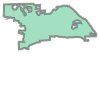

In [15]:
harvested.loc[my_row].geometry #shape of geometry

###Area of interest

In [16]:
#Area of Interest converting issues checked here
polygon_geometry = harvested.loc[my_row].geometry

# Access the coordinates of the exterior ring of the polygon as a list of tuples
exterior_coordinates = list(polygon_geometry.exterior.coords)

# Print the coordinates of the exterior ring
print("Exterior coordinates:")
print(exterior_coordinates)

# Check if the polygon has interior rings (holes)
if polygon_geometry.interiors:
    # Access the coordinates of the interior rings of the polygon as a list of lists of tuples
    interior_coordinates = [list(interior.coords) for interior in polygon_geometry.interiors]

    # Print the coordinates of each interior ring
    print("\nInterior coordinates:")
    for interior_coords in interior_coordinates:
        print(interior_coords)


Exterior coordinates:
[(-121.33169047121268, 41.23976339208205), (-121.33142485214168, 41.23917165186912), (-121.33121915286068, 41.238963985544515), (-121.33084078327312, 41.2387934319007), (-121.33043710359851, 41.23868508763777), (-121.32979840044382, 41.2385402850196), (-121.32882546770969, 41.238455214557966), (-121.32784186479775, 41.23847517291511), (-121.3268722892951, 41.238571286170135), (-121.3253373710958, 41.23885851976642), (-121.32530572355786, 41.23677406692173), (-121.32627469967342, 41.237310787982686), (-121.3265585585589, 41.23749339389308), (-121.32703548191068, 41.237687193078685), (-121.3275266249971, 41.23770846894134), (-121.32810498149874, 41.237702343781365), (-121.32834978185056, 41.23766440644299), (-121.32853794176236, 41.2374054344318), (-121.32891781550343, 41.2369721702235), (-121.32928888929263, 41.236574768540464), (-121.32944425535788, 41.236279807803946), (-121.32948544941394, 41.23595028842239), (-121.32942992950916, 41.235507332503225), (-121.3294

In [17]:
my_coords = get_coordinates(polygon_geometry)

# Convert coordinate tuples to a list of lists

my_coords = [list(coord) for coord in my_coords] #

if my_coords[0] != my_coords[-1]:
    splt1 = exterior_coordinates
    splt2 = interior_coordinates

    # Convert the coordinates to the required format
    splt1 = [list(coord) for coord in splt1]
    splt2 = [[list(coord) for coord in interior] for interior in splt2]

    # Create the area_of_interest GeoJSON
    area_of_interest = {
        "type": "MultiPolygon",
        "coordinates": [[splt1] + splt2]
    }
else:
    # Create the area_of_interest GeoJSON
    area_of_interest = {
        "type": "Polygon",
        "coordinates": [my_coords]
    }


In [18]:
area_of_interest #double check form

{'type': 'MultiPolygon',
 'coordinates': [[[[-121.33169047121268, 41.23976339208205],
    [-121.33142485214168, 41.23917165186912],
    [-121.33121915286068, 41.238963985544515],
    [-121.33084078327312, 41.2387934319007],
    [-121.33043710359851, 41.23868508763777],
    [-121.32979840044382, 41.2385402850196],
    [-121.32882546770969, 41.238455214557966],
    [-121.32784186479775, 41.23847517291511],
    [-121.3268722892951, 41.238571286170135],
    [-121.3253373710958, 41.23885851976642],
    [-121.32530572355786, 41.23677406692173],
    [-121.32627469967342, 41.237310787982686],
    [-121.3265585585589, 41.23749339389308],
    [-121.32703548191068, 41.237687193078685],
    [-121.3275266249971, 41.23770846894134],
    [-121.32810498149874, 41.237702343781365],
    [-121.32834978185056, 41.23766440644299],
    [-121.32853794176236, 41.2374054344318],
    [-121.32891781550343, 41.2369721702235],
    [-121.32928888929263, 41.236574768540464],
    [-121.32944425535788, 41.236279807803

###Search Ranges

```get_search_range()``` definition
```
Prepares string in the form: '%a, %d %b %Y %H:%M:%S %Z'
and returns a range of dates in the form: '%Y-%m-%d/%Y-%m-%d'
the second date in the range's year being offset by year_offset
```

In [19]:
def get_search_range(date_str, year_offset):
    spl_str = date_str.split()
    day = str(spl_str[1])
    month_str = spl_str[2]
    year = int(spl_str[3])
    yearout = str(year + year_offset)
    year = str(year)

    month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
    month = month_dict[month_str]

    begin = "-".join([year, month, day])
    end = "-".join([yearout, month, day])
    range = "/".join([begin, end])

    return range

In [20]:
offset = 3 #we'll search the approval/completed dates + 3 years out

approved = harvested['APPROVED'].loc[my_row] #date THP was approved
completed = harvested['COMPLETED'].loc[my_row] #date RM-71 was accepted and THP was offically completed

range_old = get_search_range(approved, offset) #approval date + 3 years
range_new = get_search_range(completed, offset) #completed date + 3 years

In [21]:
#check ranges are normal
print(f"range old: {range_old} \nrange new: {range_new}")

range old: 2012-03-23/2015-03-23 
range new: 2016-04-14/2019-04-14


###Search

In [22]:
#code for naip is "naip". Code for copernicus is "sentinel-2-l2a"

#search for image in approval range
search_old = catalog.search(
    collections=["naip"], intersects=area_of_interest, datetime=range_old
)

#search for image in completed range
search_new = catalog.search(
    collections=["naip"], intersects=area_of_interest, datetime=range_new
)

items_old = search_old.item_collection()
items_new = search_new.item_collection()

print(f"{len(items_old)} Items found in the 'old' range")
print(f"{len(items_new)} Items found in the 'new' range")

4 Items found in the 'old' range
4 Items found in the 'new' range


In [23]:
from shapely.geometry import shape

area_shape = shape(area_of_interest) #get shape of polygon
target_area = area_shape.area #get area of polygon from shape


def area_of_overlap(item):
    overlap_area = shape(item.geometry).intersection(shape(area_of_interest)).area #from shape of item calc interstion between image fou
    return overlap_area / target_area

item_older = sorted(items_old, key= area_of_overlap, reverse=True)
item_newer = sorted(items_new, key= area_of_overlap, reverse=True)

item_old = item_older[0]
item_new = item_newer[1]

In [24]:
#inspecting other picture found

#item_older[0]
#item_newer[0]

###Compare Image and Harvest Plan Dates

In [25]:
#Check if you should continue
if item_old.properties['datetime'] == item_new.properties['datetime']:
  print(f"Error: Pictures are from same day")
else:
  print(f"Continue")

Continue


In [26]:
#Approval Image
print(f"Search Date Range:\t{range_old}\nApproval Date:\t\t{approved}\nImage Date:\t\t{item_old.properties['datetime']}")

Search Date Range:	2012-03-23/2015-03-23
Approval Date:		Fri, 23 Mar 2012 07:00:00 GMT
Image Date:		2012-07-04T00:00:00Z


In [27]:
#Completed Image
print(f"Search Date Range:\t{range_new}\nCompletion Date:\t{completed}\nImage Date:\t\t{item_new.properties['datetime']}")

Search Date Range:	2016-04-14/2019-04-14
Completion Date:	Thu, 14 Apr 2016 07:00:00 GMT
Image Date:		2016-08-13T00:00:00Z


In [28]:
item_newer[3].properties

{'gsd': 0.6,
 'datetime': '2016-08-13T00:00:00Z',
 'naip:year': '2016',
 'proj:bbox': [641232.0, 4560792.0, 646914.0, 4568142.0],
 'proj:epsg': 26910,
 'naip:state': 'ca',
 'proj:shape': [12250, 9470],
 'proj:transform': [0.6, 0.0, 641232.0, 0.0, -0.6, 4568142.0, 0.0, 0.0, 1.0]}

###Check image search error

200 = Good, 403 = error

In [29]:
requests.head(item_old.assets["image"].href).status_code

200

###Display Full Images

In [30]:
#Pre-completed Timber Harvest Image
Image(url=item_old.assets["rendered_preview"].href)

In [31]:
#Post-completed Timber Harvest
Image(url=item_new.assets["rendered_preview"].href)

In [32]:
Image(url=sorted(items_new, key=area_of_overlap, reverse=True)[3].assets["rendered_preview"].href)

In [33]:
#Image(url=sorted(items_new, key=area_of_overlap, reverse=True)[0].assets["rendered_preview"].href)

##Image Clips
View GSD, select image's RGB and NIR bands, reproject coordinates (they come in a differnet format than you searched with), clip image to area_of_interest, view pure image once clipped

In [34]:
#What are the old and new images' ground sampling distances?
print(f"Ground Sampling Distance of Images")
print(f"Old Image GSD: {item_old.properties['gsd']}\nNew Image GSD: {item_new.properties['gsd']}")

Ground Sampling Distance of Images
Old Image GSD: 1.0
New Image GSD: 0.6


In [38]:
#store image bands
old_ds = rio.open_rasterio(item_old.assets["image"].href).sel(band=[1, 2, 3, 4])
new_ds = rio.open_rasterio(item_new.assets["image"].href).sel(band=[1, 2, 3, 4])
#correct CRS of image bands
old_reprojected = old_ds.rio.reproject("EPSG:4326", resampling=0)
new_reprojected = new_ds.rio.reproject("EPSG:4326", resampling=0)
#clip image bands
old_clipped = old_reprojected.rio.clip([area_of_interest])
new_clipped = new_reprojected.rio.clip([area_of_interest])

old_clipped.sel(band=1).rio.to_raster(f"oldBandRed_{harvested.OBJECTID[my_row]}.tif")
old_clipped.sel(band=2).rio.to_raster(f"oldBandBlue_{harvested.OBJECTID[my_row]}.tif")
old_clipped.sel(band=3).rio.to_raster(f"oldBandGreen_{harvested.OBJECTID[my_row]}.tif")
old_clipped.sel(band=4).rio.to_raster(f"oldBandNIR_{harvested.OBJECTID[my_row]}.tif")


new_clipped.sel(band=1).rio.to_raster(f"newBandRed_{harvested.OBJECTID[my_row]}.tif")
new_clipped.sel(band=2).rio.to_raster(f"newBandBlue_{harvested.OBJECTID[my_row]}.tif")
new_clipped.sel(band=3).rio.to_raster(f"newBandGreen_{harvested.OBJECTID[my_row]}.tif")
new_clipped.sel(band=4).rio.to_raster(f"newBandNIR_{harvested.OBJECTID[my_row]}.tif")

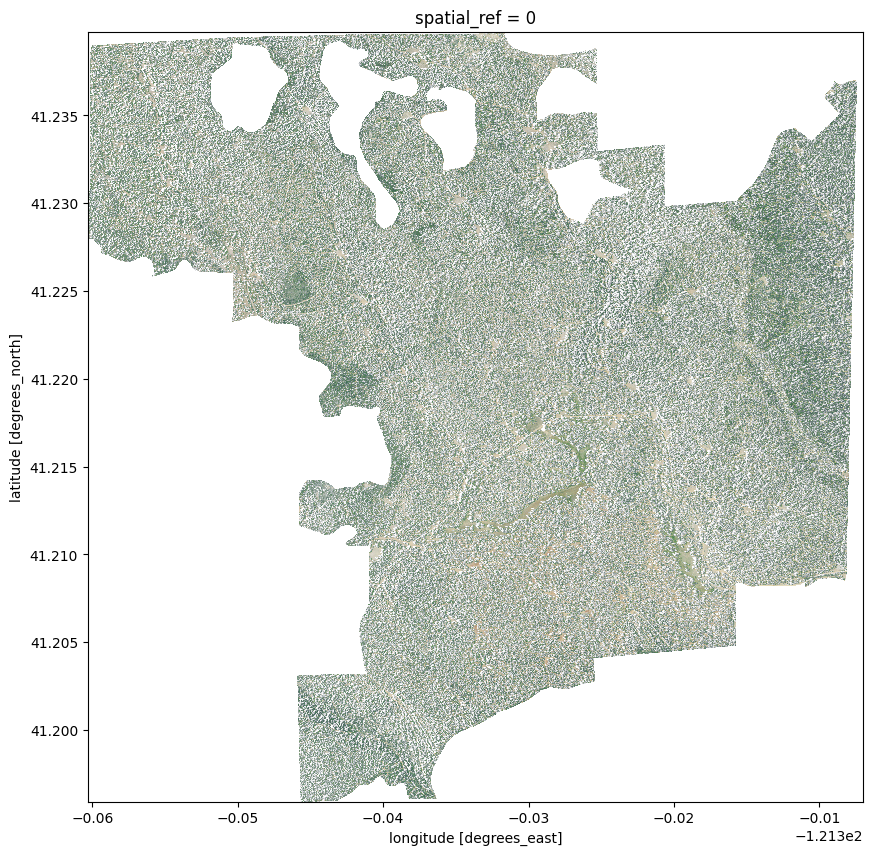

In [ ]:
#view pure old image of THP
old_clipped.plot.imshow(robust=True, figsize=(10, 10))
plt.show()

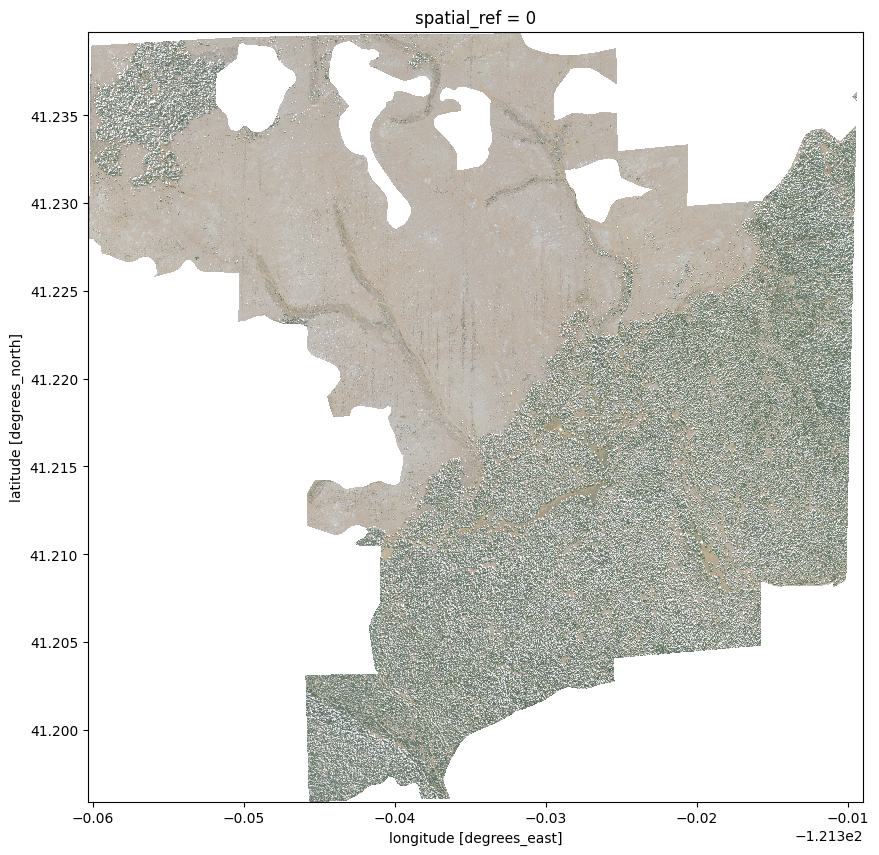

In [ ]:
#view pure new image of THP
new_clipped.plot.imshow(robust=True, figsize=(10, 10))
plt.show()

##Show Clipped Bands
Veiw row's treatment plan, intended geometry, adn old & new images RGB & NIR bands side by side

In [ ]:
#What row and treatment are we currrently looking at?
treatment_plan = harvested['SILVI_1'].iloc[my_row]
print(f"Row {my_row}'s Treatment Plan: {treatment_plan}")

Row 12636's Treatment Plan: Selection


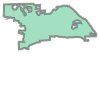

In [ ]:
#how is the picture supposed to be shaped?
harvested.loc[my_row].geometry #shape of geometry

###Band 1: Red

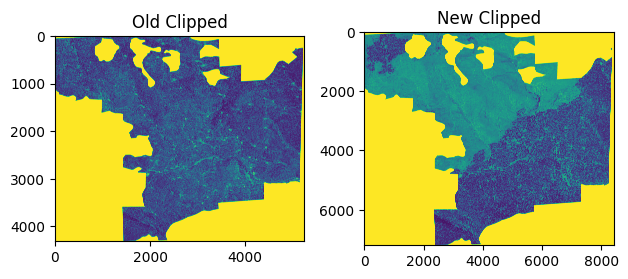

In [ ]:
fig, (axR1, axR2) = plt.subplots(1, 2) #show them next to eachother
#Post Approved Date
axR1.imshow(old_clipped.sel(band=1).values) #band 1 = Red Band
axR1.set_title('Old Clipped')
#Post Completed Date
axR2.imshow(new_clipped.sel(band=1).values)
axR2.set_title('New Clipped')

plt.tight_layout() #close but no overlap please
plt.show() #look!

###Band 2: Blue

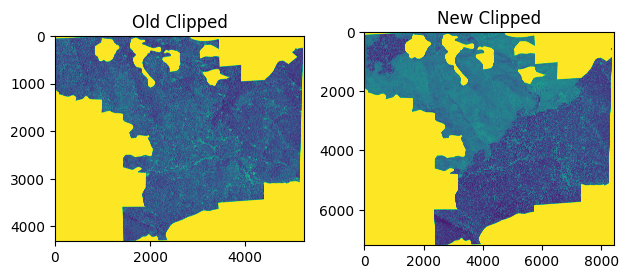

In [ ]:
fig, (axB1, axB2) = plt.subplots(1, 2)

axB1.imshow(old_clipped.sel(band =2).values)
axB1.set_title('Old Clipped')

axB2.imshow(new_clipped.sel(band =2).values)
axB2.set_title('New Clipped')

plt.tight_layout()
plt.show()

###Band 3: Green

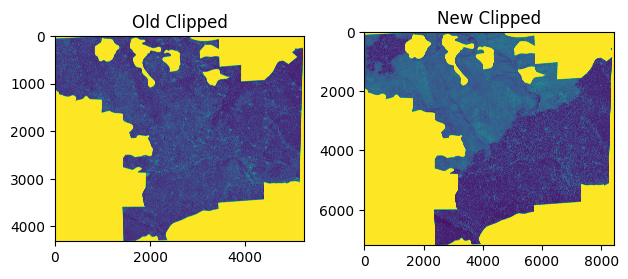

In [ ]:
fig, (axG1, axG2) = plt.subplots(1, 2)

axG1.imshow(old_clipped.sel(band =3).values)
axG1.set_title('Old Clipped')

axG2.imshow(new_clipped.sel(band =3).values)
axG2.set_title('New Clipped')

plt.tight_layout()
plt.show()

###Band 4: Near-InfraRed

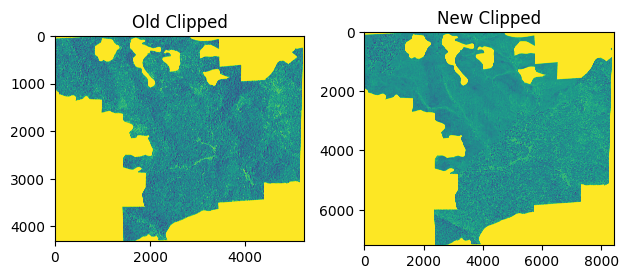

In [ ]:
fig, (axNIR1, axNIR2) = plt.subplots(1, 2)

axNIR1.imshow(old_clipped.sel(band=4).values)
axNIR1.set_title('Old Clipped')

axNIR2.imshow(new_clipped.sel(band=4).values)
axNIR2.set_title('New Clipped')

plt.tight_layout()
plt.show()

Deep learning pathway
The picture itself

Shallow learning pathway


##Big Plots on Maps
General Info about our Data Set

Using original CRS to plot (not using gdf: harvested)

<Axes: >

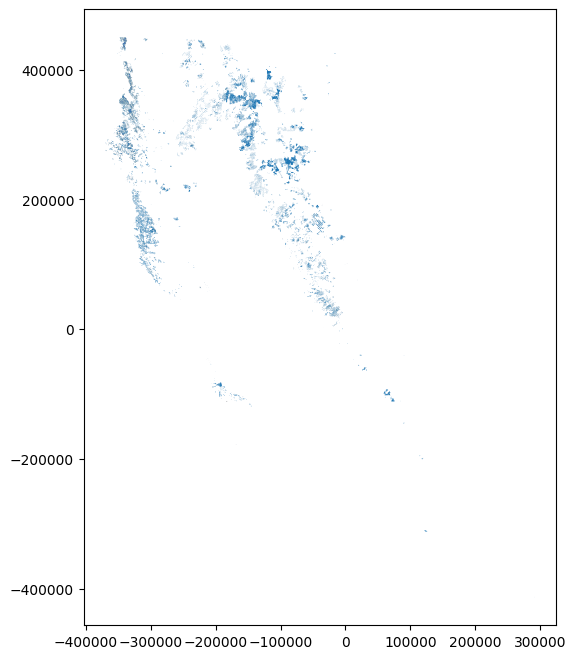

In [ ]:
#All timber harvest plans
timber.plot(figsize=(8, 8))

<Axes: >

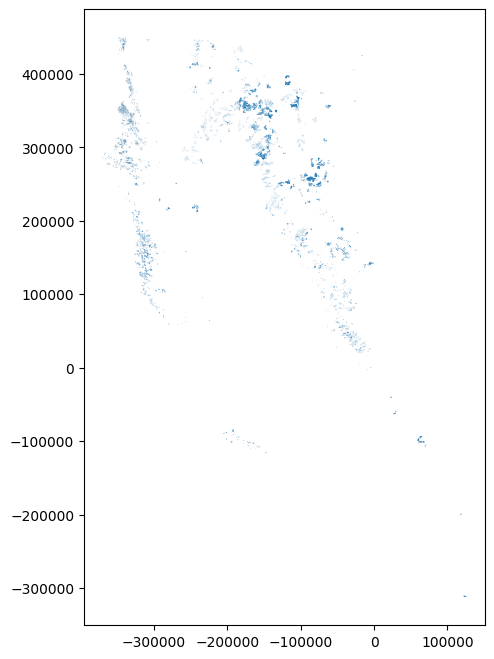

In [ ]:
#completed and harvestable plans (filtered plans)
filtered_gdf.plot(figsize=(8, 8))

<Axes: >

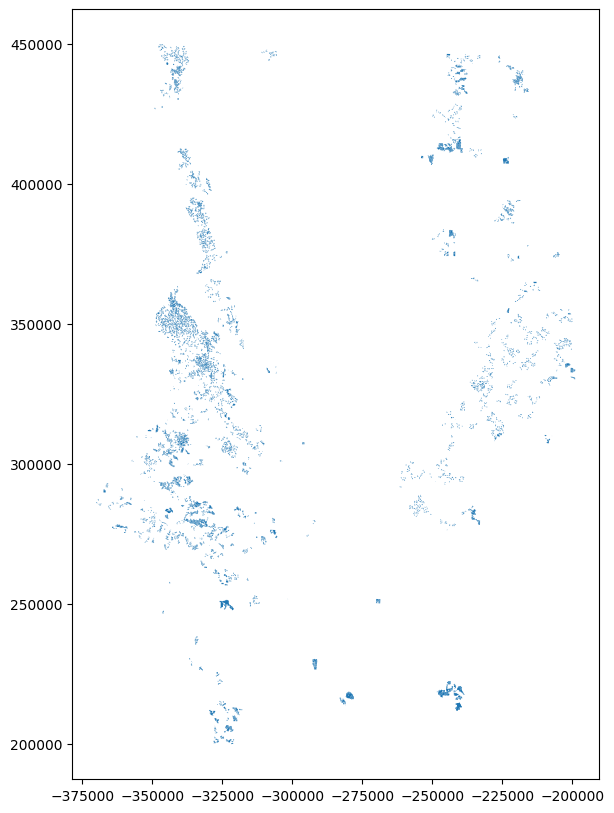

In [ ]:
#North West Section of California (filtered plans)
NorWestCal = filtered_gdf.cx[:-200000, 200000:]

NorWestCal.plot(figsize=(10, 10))

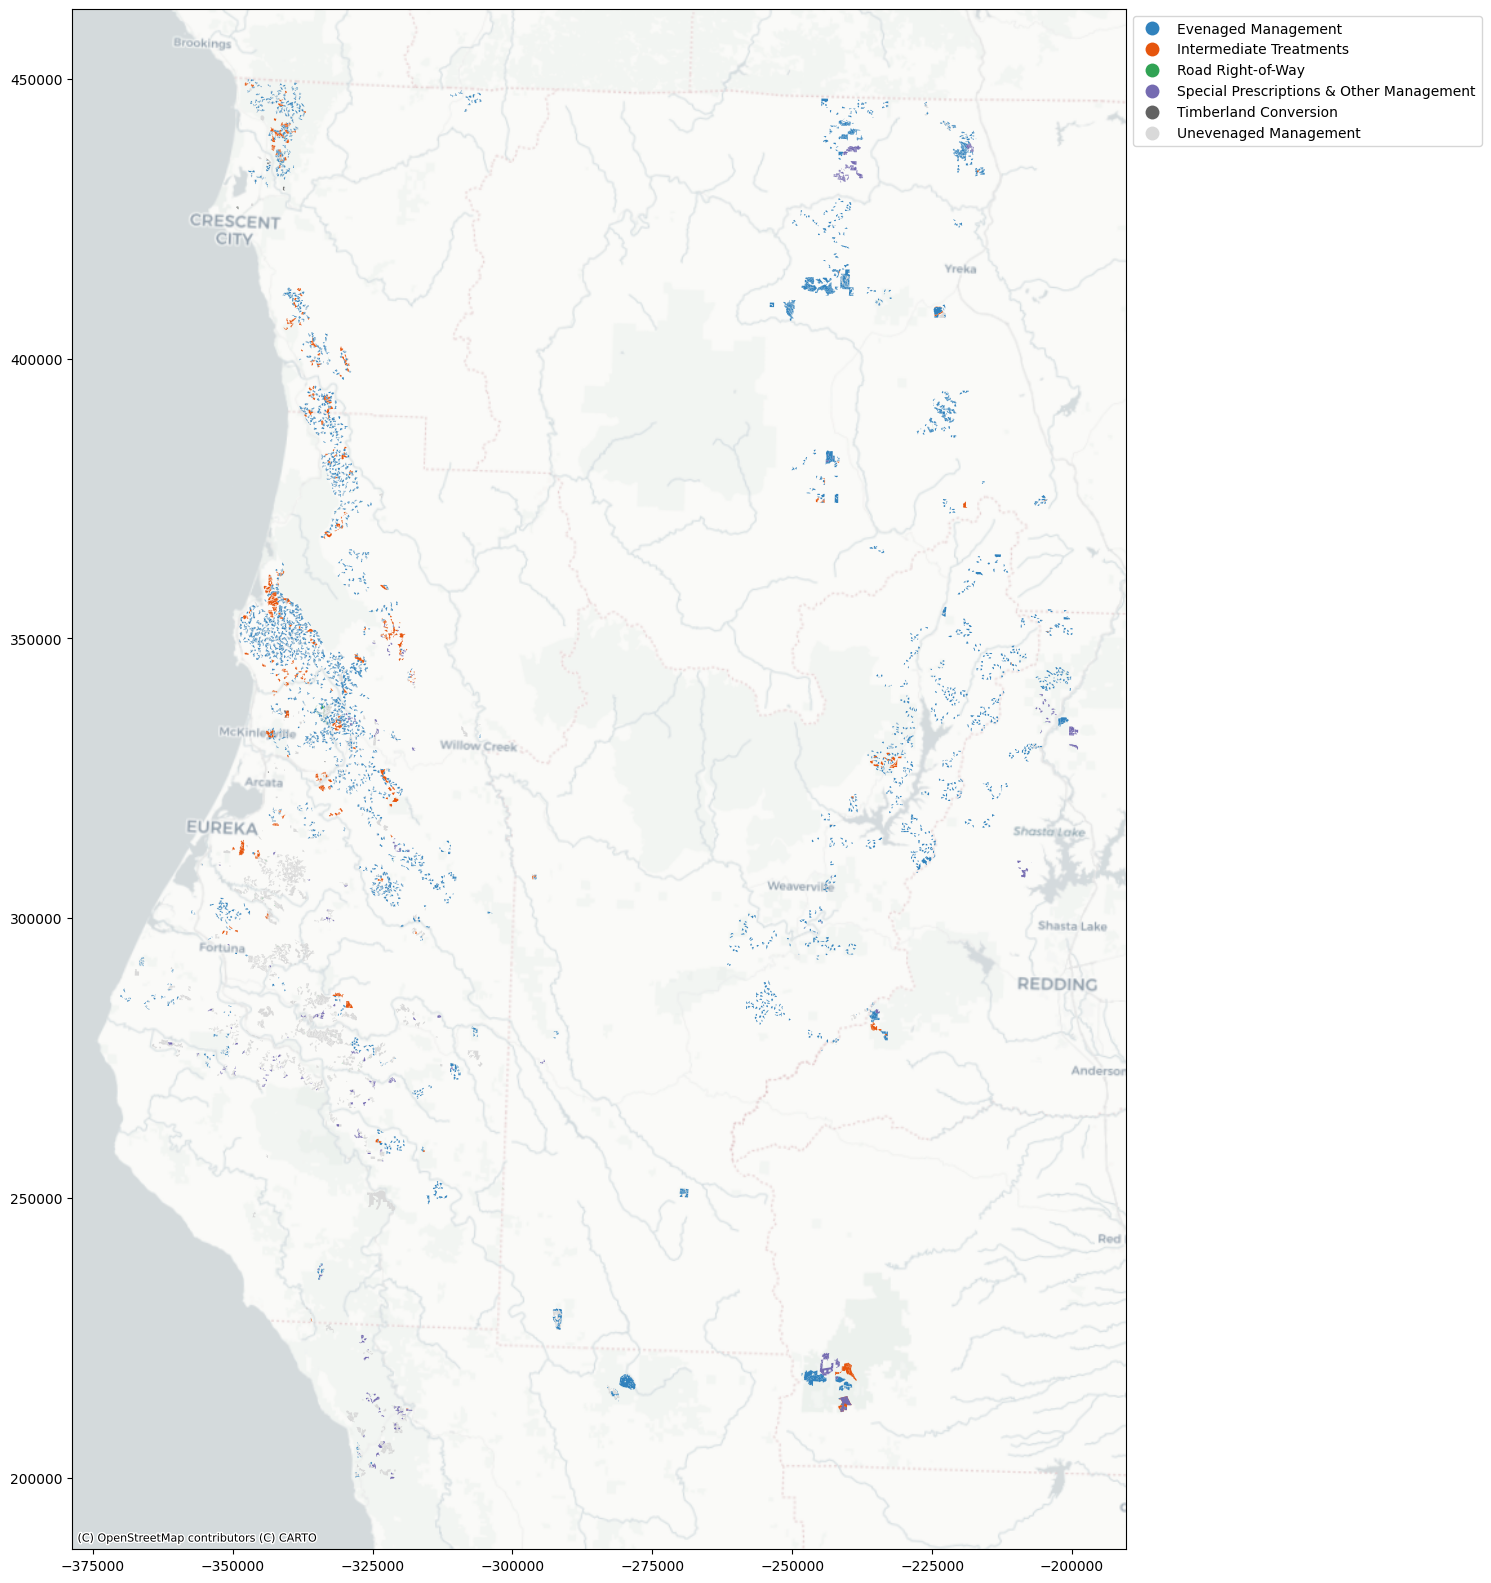

In [ ]:
#NorthWest California by Treatment Category w/ Base Map

silvicatplot = NorWestCal.plot(column='SILVI_CAT', cmap='tab20c', legend=True, figsize=(20, 20), legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})

ctx.add_basemap(silvicatplot, crs=NorWestCal.crs,source=ctx.providers.CartoDB.Positron)
plt.show()

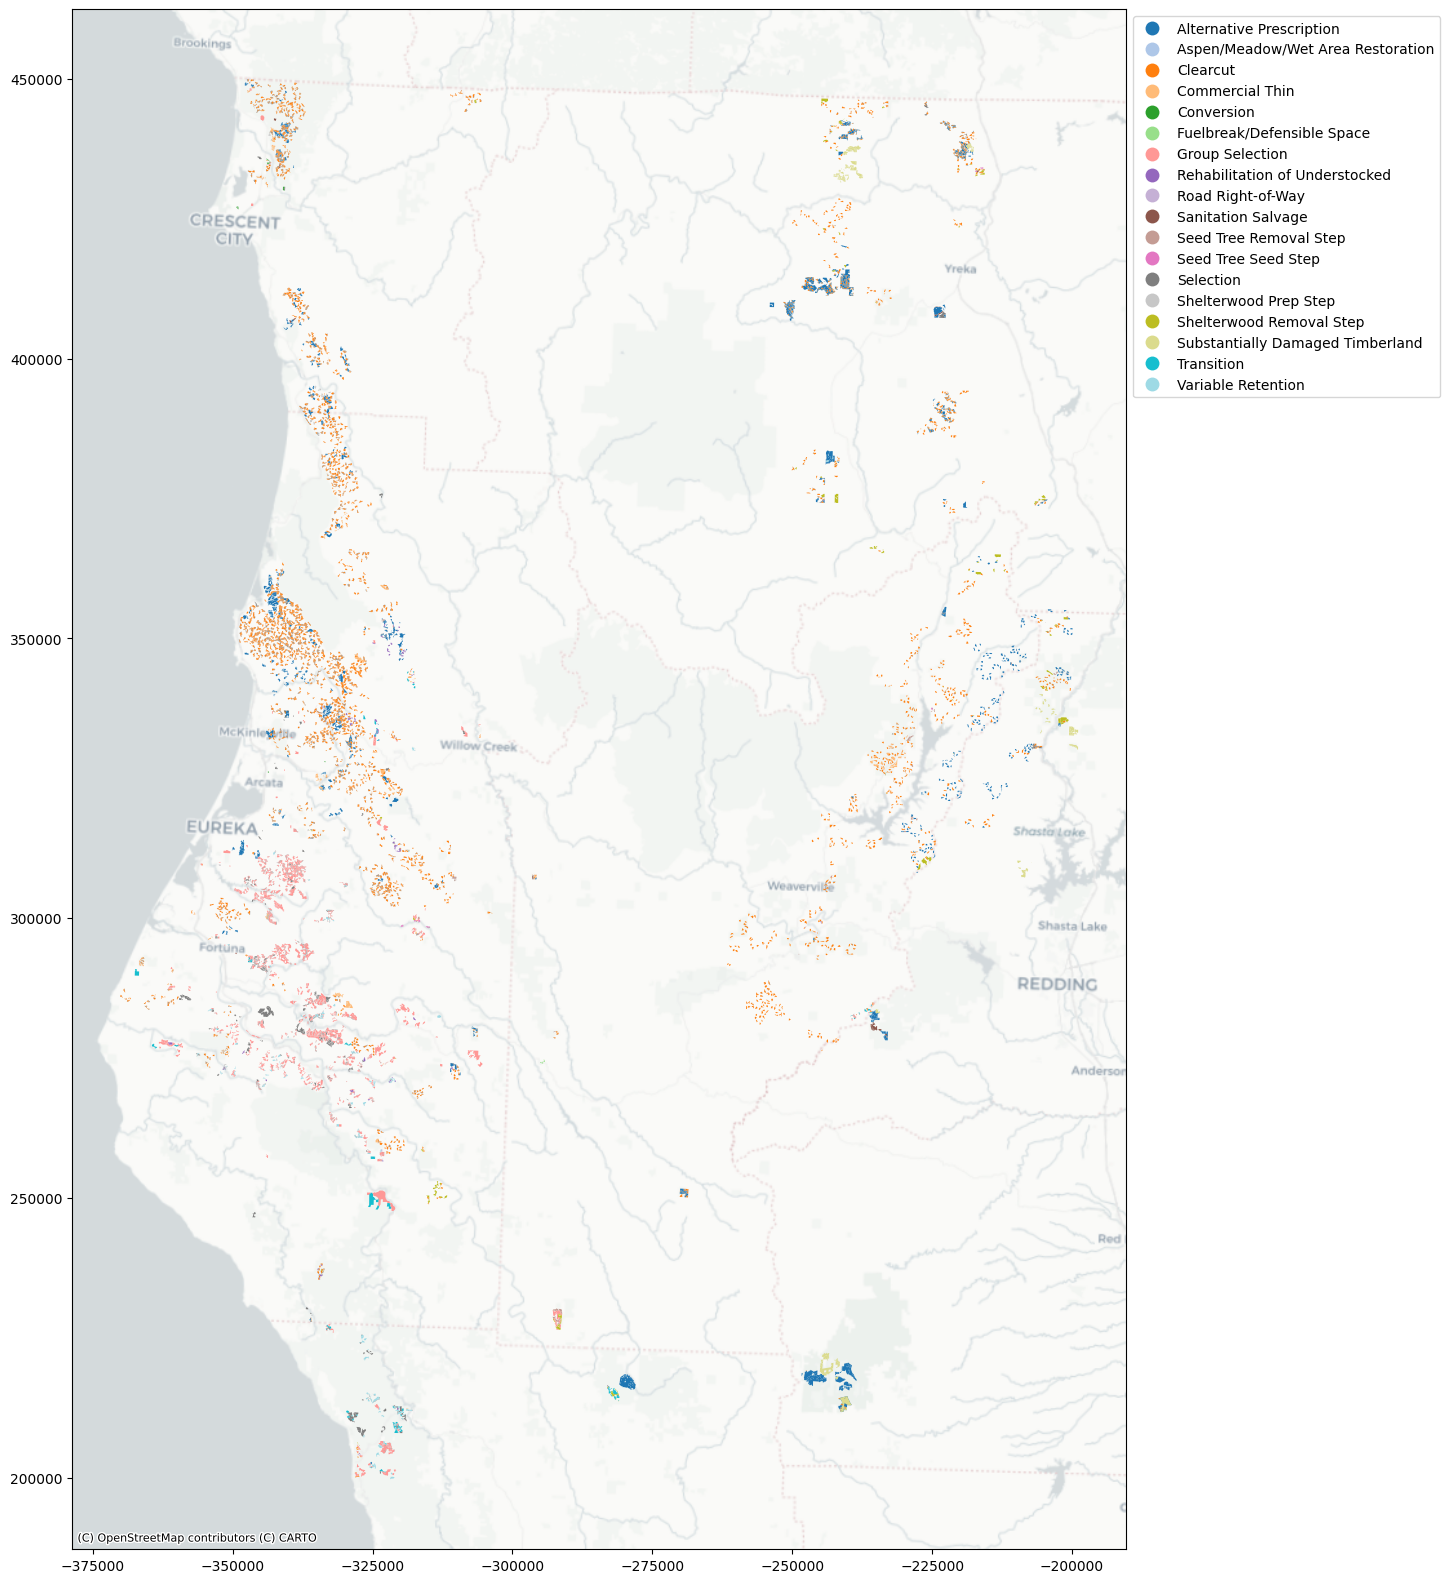

In [ ]:
#NorthWest California by Treatment Type w/ Base Map
fig, ax = plt.subplots(figsize=(20, 20))

silvi1plot=NorWestCal.plot(column='SILVI_1', cmap='tab20', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
ctx.add_basemap(silvi1plot, crs=NorWestCal.crs,source=ctx.providers.CartoDB.Positron)
plt.show()

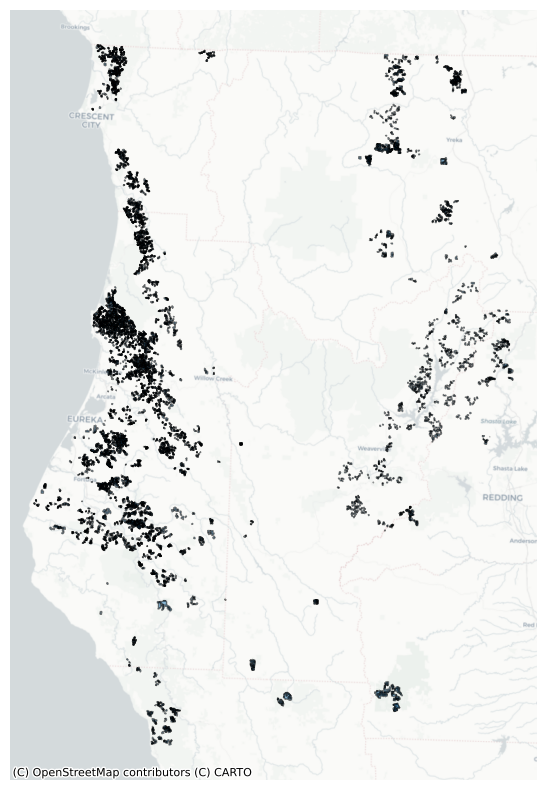

In [ ]:
#trying add_basemap()
ax = NorWestCal.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
ctx.add_basemap(ax, crs=NorWestCal.crs,source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()